In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import itertools
from scipy import linalg
from sklearn import mixture

In [9]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")
df

,TangibilityCondition,AmountDonated,Sympathy,Imaginability,Impact
0,1.0,0.0,7.0,4.0,4.5
1,1.0,0.0,2.0,2.0,2.0
2,1.0,0.0,7.0,3.0,3.0
3,1.0,0.0,4.0,3.0,4.5
4,1.0,0.0,3.0,7.0,1.0
...,...,...,...,...,...
89,0.0,2.0,5.0,2.0,4.5
90,0.0,5.0,7.0,7.0,7.0
91,0.0,2.0,4.0,4.0,5.5
92,0.0,2.0,5.0,3.0,5.5


In [110]:
X = df

In [11]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

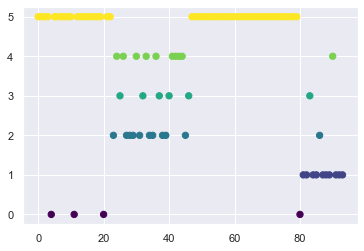

In [132]:
labels = gmm.predict(X)
results = pd.DataFrame([X.index,labels]).T
plt.scatter(results[0], results[1],  c=labels, s=40, cmap='viridis')

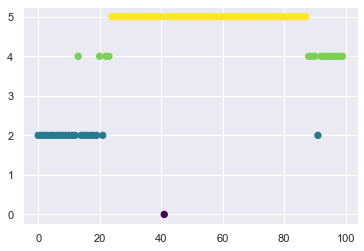

In [136]:
Xnew, _ = best_gmm.sample(100)
Xnew = pd.DataFrame(Xnew)
labels = gmm.predict(Xnew)
results = pd.DataFrame([Xnew.index,labels]).T
plt.scatter(results[0], results[1],  c=labels, s=40, cmap='viridis')

In [17]:
import os
import sys
import networkx as nx
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from causal_discovery.algorithms.ic_algorithm import IC_Algorithm
from causal_discovery.independence_tests.robust_regression_test import RobustRegressionTest

In [23]:

# run the search
ic_algorithm = IC_Algorithm(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)

/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))
/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{}

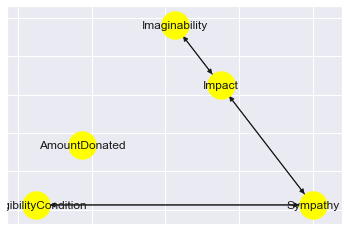

In [50]:

digraph = nx.DiGraph(graph)
labels = nx.get_edge_attributes(digraph, 'weight')
labels_rounded = labels.copy()
for k, v in labels.items():
    labels_rounded[k] = np.round(v, 3)

options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 1,
    'arrowstyle': '-|>',
}
# pos = nx.spring_layout(digraph2)  # positions for all nodes
pos = nx.planar_layout(digraph)
nx.draw_networkx(digraph, arrows=True, pos=pos, **options)
nx.draw_networkx_edge_labels(digraph, pos, edge_labels=labels_rounded)

In [27]:
from causal_discovery.algorithms.lingam_algorithm import LiNGAM_GC_Algorithm
X, test_adjacency_matrix, test_causal_order = LiNGAM_GC_Algorithm.generate_test_gcm(4, 3)
model = LiNGAM_GC_Algorithm()
model.fit(X)
causal_order, adjacency_matrix = model.get_results()

Estimated causal order
[3, 1, 0, 2]
Estimated graph structure
[[ 0.         -0.19222573  0.          0.40127236]
 [ 0.          0.          0.          0.33686156]
 [-0.3377833   0.33735638  0.          0.33053631]
 [ 0.          0.          0.          0.        ]]


{(0, 1): Text(0.0, -0.375, '-0.192'),
 (0, 3): Text(-0.5, -0.125, '0.401'),
 (0, 2): Text(-0.5, 0.125, '-0.338'),
 (1, 0): Text(0.0, -0.375, '-0.192'),
 (1, 3): Text(0.5, -0.125, '0.337'),
 (1, 2): Text(0.5, 0.125, '0.337'),
 (2, 0): Text(-0.5, 0.125, '-0.338'),
 (2, 1): Text(0.5, 0.125, '0.337'),
 (2, 3): Text(0.0, 0.375, '0.331'),
 (3, 0): Text(-0.5, -0.125, '0.401'),
 (3, 1): Text(0.5, -0.125, '0.337'),
 (3, 2): Text(0.0, 0.375, '0.331')}

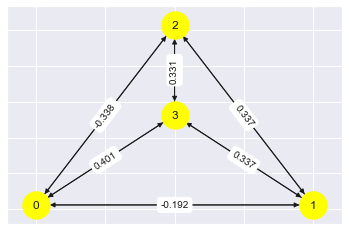

In [31]:
graph1 = nx.from_numpy_matrix(adjacency_matrix)
digraph1 = nx.DiGraph(graph1)
labels = nx.get_edge_attributes(digraph1, 'weight')
labels_rounded = labels.copy()
for k, v in labels.items():
    labels_rounded[k] = np.round(v, 3)

options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 1,
    'arrowstyle': '-|>',
}
# pos = nx.spring_layout(digraph2)  # positions for all nodes
pos = nx.planar_layout(digraph1)
nx.draw_networkx(digraph1, arrows=True, pos=pos, **options)
nx.draw_networkx_edge_labels(digraph1, pos, edge_labels=labels_rounded)

In [84]:
samples = best_gmm.sample(100)
# df_samples = pd.DataFrame(samples, columns = ["TangibilityCondition", 
#                                               "AmountDonated", "Sympathy", 
#                                               "Imaginability", "Impact"])
df_samples = pd.DataFrame(samples)
a, b = samples
df_samples = pd.DataFrame(a, columns = ["TangibilityCondition", 
                                               "AmountDonated", "Sympathy", 
                                               "Imaginability", "Impact"])

In [85]:
df_samples

,TangibilityCondition,AmountDonated,Sympathy,Imaginability,Impact
0,0.947388,1.603108,4.349021,0.881038,3.875479
1,0.576298,1.050056,4.171447,2.078929,3.498673
2,-0.086519,1.141509,4.097759,1.895283,3.527937
3,0.101068,1.246460,5.037130,1.619348,3.670238
4,0.567069,1.587182,4.244549,1.469227,3.830906
...,...,...,...,...,...
95,0.989924,5.000493,6.401510,5.226682,7.468664
96,0.311037,5.000206,7.209929,5.019291,6.627917
97,0.680076,4.999321,5.445308,4.325880,6.160130
98,0.049304,4.998865,7.619078,5.474341,3.531205


In [86]:
# run the search
ic_algorithm = IC_Algorithm(RobustRegressionTest)
graph3 = ic_algorithm.search(df_samples, variable_types)

/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{}

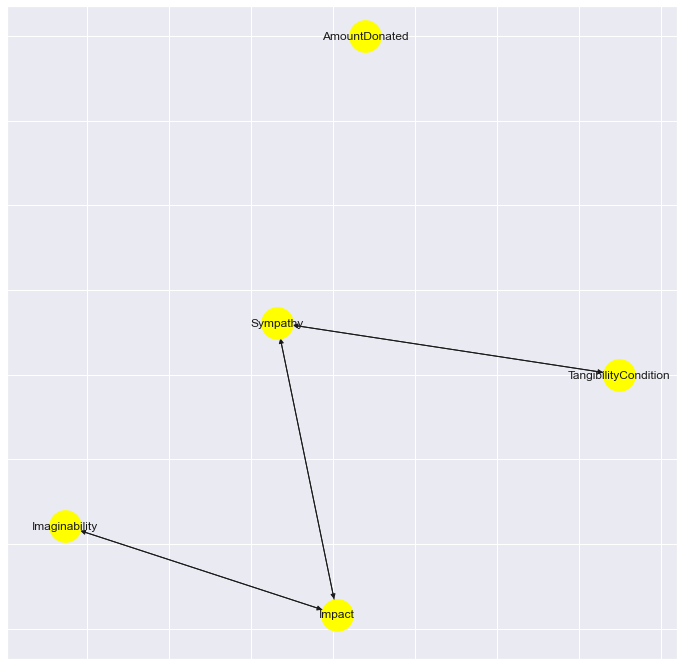

In [87]:
digraph3 = nx.DiGraph(graph3)
labels = nx.get_edge_attributes(digraph3, 'weight')
labels_rounded = labels.copy()
for k, v in labels.items():
    labels_rounded[k] = np.round(v, 3)

options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
}
#pos = nx.spring_layout(digraph3)  # positions for all nodes
plt.figure(3,figsize=(12,12)) 
pos = nx.kamada_kawai_layout(digraph3)
nx.draw_networkx(digraph, arrows=True, pos=pos, **options)
nx.draw_networkx_edge_labels(digraph3, pos, edge_labels=labels_rounded)

In [88]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

In [89]:
from pycausal import search as s
tetrad = s.tetradrunner()

In [90]:
tetrad.getAlgorithmParameters(algoId = 'fci', testId = 'fisher-z-test')

depth: This variable is usually called “depth” for algorithms such as PC in which conditioning sets are considered of increasing size from zero up to some limit, called “depth”. For example, if depth = 3, conditioning sets will be considered of sizes 0, 1, 2, and 3. In order to express that no limit should be imposed, use the value -1. (java.lang.Integer) [default:-1]
maxPathLength: See Spirtes, Glymour, and Scheines (2000), Causation, Prediction, and Search for the definition of discrimination path. Finding discriminating paths can be expensive. This sets the maximum length of such paths that the algorithm tries to find. (java.lang.Integer) [default:-1]
completeRuleSetUsed: For the FCI algorithm, to final orientation rules sets are available, one due to P. Spirtes, guaranteeing arrow completeness, and a second due to J. Zhang, guaranteeing additional tail completeness. If this parameter is set to “Yes,” the tail-complete rule set will be used. (java.lang.Boolean) [default:false]
verbo

In [91]:
tetrad.run(algoId = 'fci', dfs = df_samples, testId = 'fisher-z-test', 
           depth = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, verbose = True)

In [92]:
tetrad.getEdges()

['TangibilityCondition o-> Sympathy',
 'AmountDonated o-> Sympathy',
 'AmountDonated o-o Impact']

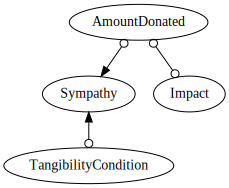

In [93]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [94]:
tetrad.getAlgorithmParameters(algoId = 'pc-all', testId = 'fisher-z-test')

stableFAS: In Colombo, D., & Maathuis, M. H. (2014, Order-independent constraint-based causal structure learning, The Journal of Machine Learning Research, 15(1), 3741-3782), a modification of the adjacency search of PC was proposed that results in invariance under order permutations of the variables in the data. If this parameter is set to ‘Yes’, this version of the PC adjacency search is used. (java.lang.Boolean) [default:true]
concurrentFAS: Various versions of the PC adjacency search lend themselves to concurrent processing—that is, doing different independence tests in parallel to speed up the processing. If this parameter is set to ‘Yes’, and this option is available, it will be used. (java.lang.Boolean) [default:false]
colliderDiscoveryRule: For variants of PC, one may choose from one of three different ways for orienting colliders. One may look them up from sepsets, as in the original PC, or estimate them conservatively, as from the Conservative PC algorithm, or by choosing the

In [95]:
tetrad.run(algoId = 'pc-all', dfs = df_samples, testId = 'fisher-z-test', 
           fasRule = 2, depth = 2, conflictRule = 1, concurrentFAS = True,
           useMaxPOrientationHeuristic = True, verbose = True)

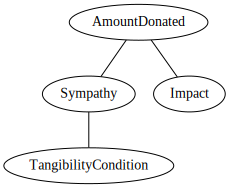

In [96]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)